In [336]:
import sys
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.insert(1, "../gapfilling/scripts/")

In [52]:
from Gapfilling import *
from modelseed_gapfilling import *

In [5]:
# Setting gurobi as solver
cobra_config = cobra.Configuration()
cobra_config.solver = "gurobi"

In [6]:
# Loading reference models
# L. lactis
l_lactis_ref = read_sbml_model("models/references/iNF517.xml")
# P. putida
p_putida_ref = read_sbml_model("models/references/iJN1463.xml")
# E. coli
e_coli_ref = read_sbml_model("models/references/iML1515.xml")

Using license file /home/fco/gurobi.lic
Academic license - for non-commercial use only - expires 2021-08-10


In [57]:
# Loading strain-specific models
strain_files = []
strain_dir = "models/strains/"

for file in glob.iglob(strain_dir + "*.xml"):
    strain_files.append(file)
    
strain_names = [file[15:-4] for file in strain_files]

strain_models = []
for i in range(len(strain_files)):
    strain_models.append(read_sbml_model(strain_files[i]))
    # naming models
    strain_models[i].id = strain_names[i]
    
print("There are " + str(len(strain_models)) + " models.")

'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not 

There are 43 models.


In [58]:
strain_models

[<Model NZ_CP066300.1 at 0x7f1d3fe99bb0>,
 <Model NZ_CP015899.1 at 0x7f1d3dee66a0>,
 <Model NZ_CP015900.1 at 0x7f1d8db82820>,
 <Model NZ_AP018499.1 at 0x7f1d37933e50>,
 <Model NC_020450.1 at 0x7f1d35e9bd30>,
 <Model NZ_CP015894.1 at 0x7f1d39e1cdf0>,
 <Model NZ_CP015901.1 at 0x7f1d38379910>,
 <Model NZ_LT599049.1 at 0x7f1d3d54cbb0>,
 <Model NC_008527.1 at 0x7f1d34f71dc0>,
 <Model NZ_CP015902.1 at 0x7f1d354fcb20>,
 <Model NZ_CP010050.1 at 0x7f1d34724220>,
 <Model NZ_CP032526.1 at 0x7f1d3a8cc790>,
 <Model NZ_CP032430.1 at 0x7f1d39e7fbb0>,
 <Model NZ_AP024222.1 at 0x7f1d3c91d9d0>,
 <Model NC_019435.1 at 0x7f1d34a00b20>,
 <Model NZ_CP070856.1 at 0x7f1d35e0bd90>,
 <Model NZ_CP015907.1 at 0x7f1d36c96b20>,
 <Model NZ_CP061322.1 at 0x7f1d398fc850>,
 <Model NZ_AP024210.1 at 0x7f1d34695b50>,
 <Model NZ_CP015896.1 at 0x7f1d2ed36bb0>,
 <Model NZ_CM007353.1 at 0x7f1d2da1fd30>,
 <Model CP071728.1 at 0x7f1d2d2d66a0>,
 <Model NZ_CP032058.1 at 0x7f1d2d175f10>,
 <Model NZ_CP015909.1 at 0x7f1d2c55f7c0>,
 

In [59]:
# all models have biomass as objective function
# let's check fluxes
IDs = [x.id for x in strain_models]
Flux_values = [x.optimize().objective_value for x in strain_models]
Reactions = [len(x.reactions) for x in strain_models]

d = {'Strain': IDs, 'Flux Value': Flux_values, 'Number of Reactions': Reactions}
df = pd.DataFrame(d)
df

,Strain,Flux Value,Number of Reactions
0,NZ_CP066300.1,0.000000,729
1,NZ_CP015899.1,NaN,694
2,NZ_CP015900.1,NaN,699
3,NZ_AP018499.1,0.000000,693
4,NC_020450.1,0.000000,735
5,NZ_CP015894.1,NaN,716
6,NZ_CP015901.1,0.000000,716
7,NZ_LT599049.1,0.000000,732
8,NC_008527.1,NaN,706
9,NZ_CP015902.1,0.000000,732


We can note that all models but three have a null flux or the calculations are infeasible (NaN). The models with a positive flux are the following:

In [60]:
df.loc[df['Flux Value'] > 0]

,Strain,Flux Value,Number of Reactions
20,NZ_CM007353.1,0.026255,739
32,NC_022369.1,0.042635,743
35,NC_017949.1,0.042635,749


In [61]:
# Comparing with reference
print('ID: ', l_lactis_ref.id)
print('Flux Value: ', l_lactis_ref.optimize().objective_value)
print('Number of Reactions: ', len(l_lactis_ref.reactions))

ID:  iNF517
Flux Value:  0.04263460544337326
Number of Reactions:  754


In [63]:
# Let's perform base gap-filling
gap_filled_models = []
for x in strain_models:
    sol = homology_gapfilling(x, [l_lactis_ref, e_coli_ref, p_putida_ref], integer_threshold = 1e-9)
    gap_filled_models.append(sol)

Read LP format model from file /tmp/tmpcownxhw1.lp
Reading time = 0.02 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmpdhoniuju.lp
Reading time = 0.01 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmprgkkv9ro.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros
Read LP format model from file /tmp/tmpn8szikyo.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpcq91qfg0.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmp9b8kka8j.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmpvccmu0uf.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmpjm5mfi8n.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


Read LP format model from file /tmp/tmpc6x4d_5y.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5890 nonzeros
Read LP format model from file /tmp/tmpg7bo5t00.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros
Read LP format model from file /tmp/tmp8br9buz5.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpecs2i94d.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5890 nonzeros
Read LP format model from file /tmp/tmphcumlu06.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5890 nonzeros
Read LP format model from file /tmp/tmpkk62u89z.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmpondor18q.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

iML1515: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp5tfocdh9.lp
Readi

Read LP format model from file /tmp/tmp5cx_u44b.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp697yl3_0.lp
Reading time = 0.00 seconds
: 650 rows, 1432 columns, 6102 nonzeros
Read LP format model from file /tmp/tmpdc9urg9z.lp
Reading time = 0.00 seconds
: 650 rows, 1432 columns, 6102 nonzeros
Read LP format model from file /tmp/tmpozh0jwix.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmpuljdjwna.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

iML1515: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpzul1qpzv.lp
Reading time = 0.00 seconds
: 650 rows, 1432 columns, 6102 nonzeros
Read LP format model from file /tmp/tmpxp3zor1h.lp
Reading time = 0.01 seconds
: 650 rows, 1432 columns, 6102 nonzeros
Read LP format model from file /tmp/tmp2vpp50ks.lp
Readi

Reading time = 0.00 seconds
: 650 rows, 1492 columns, 6364 nonzeros
Read LP format model from file /tmp/tmpyrszwi5d.lp
Reading time = 0.00 seconds
: 650 rows, 1492 columns, 6364 nonzeros
Read LP format model from file /tmp/tmplz0eqosm.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmps920zsq0.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

iML1515: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpat_4sruq.lp
Reading time = 0.00 seconds
: 650 rows, 1492 columns, 6364 nonzeros
Read LP format model from file /tmp/tmp2gqofvdp.lp
Reading time = 0.00 seconds
: 650 rows, 1492 columns, 6364 nonzeros
Read LP format model from file /tmp/tmpuxf5m3o0.lp
Reading time = 0.01 seconds
: 2153 rows, 5854 columns, 23272 nonzeros
Read LP format model from file /tmp/tmpij58ppt6.lp
Reading time = 0.01 seconds
: 2153 rows, 5854 columns, 23272 nonzeros

iJN1463: gapfilling optimization fai

Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmp4k6soeto.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

iML1515: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmperp9do9d.lp
Reading time = 0.00 seconds
: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmp3po120tj.lp
Reading time = 0.00 seconds
: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmpi1b93tdn.lp
Reading time = 0.01 seconds
: 2153 rows, 5854 columns, 23272 nonzeros
Read LP format model from file /tmp/tmp0o57hqmf.lp
Reading time = 0.01 seconds
: 2153 rows, 5854 columns, 23272 nonzeros

iJN1463: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpr325a_nq.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6250 nonzeros
Read LP format model from file /tmp/tmp7jjeyd40.lp
Reading time = 0.00 seconds
: 650 rows, 1458 column

'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp_s5fl5ct.lp
Reading time = 0.00 seconds
: 650 rows, 1338 columns, 5666 nonzeros
Read LP format model from file /tmp/tmp_swsw0dx.lp
Reading time = 0.00 seconds
: 650 rows, 1338 columns, 5666 nonzeros
Read LP format model from file /tmp/tmppcfpqmbx.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros
Read LP format model from file /tmp/tmpi5jsw6kj.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpzloiqluu.lp
Reading time = 0.00 seconds
: 650 rows, 1338 columns, 5666 nonzeros
Read LP format model from file /tmp/tmpd6q94qg9.lp
Reading time = 0.02 seconds
: 650 rows, 1338 columns, 5666 nonzeros
Read LP format model from file /tmp/tmpape2eiex.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmp6kfpzyug.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 

: 650 rows, 1430 columns, 6092 nonzeros
Read LP format model from file /tmp/tmpzyc1at7_.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros
Read LP format model from file /tmp/tmpjq2pu8qv.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp2gr2hzc5.lp
Reading time = 0.01 seconds
: 650 rows, 1430 columns, 6092 nonzeros
Read LP format model from file /tmp/tmpmth4wo8o.lp
Reading time = 0.00 seconds
: 650 rows, 1430 columns, 6092 nonzeros
Read LP format model from file /tmp/tmpjqa59ffj.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmphl9xh6w8.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

iML1515: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpmqh5aiv0.lp
Reading time = 0.00 seconds
: 650 rows, 1430 columns, 6092 nonzeros
Read LP format m

Reading time = 0.02 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp4mbhr91k.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6266 nonzeros
Read LP format model from file /tmp/tmpr81tlwsz.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6266 nonzeros
Read LP format model from file /tmp/tmplyr2ze37.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmprrfj8rfg.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

iML1515: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmphplkm04q.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6266 nonzeros
Read LP format model from file /tmp/tmpyakk2olr.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6266 nonzeros
Read LP format model from file /tmp/tmpidjxln5d.lp
Reading time = 0.01 seconds
: 2153 rows, 5854 columns, 2

'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpafd7oyu7.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmpw834m0o7.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmpypjg7elz.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros
Read LP format model from file /tmp/tmpvh80mj_n.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp0lvvu59i.lp
Reading time = 0.01 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmp_8n9c289.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmpz7o04hy6.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmpjgrl0yvk.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 

'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpfr8d1v1w.lp
Reading time = 0.00 seconds
: 650 rows, 1382 columns, 5876 nonzeros
Read LP format model from file /tmp/tmpobq1a2hr.lp
Reading time = 0.02 seconds
: 650 rows, 1382 columns, 5876 nonzeros
Read LP format model from file /tmp/tmphxkijdew.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros
Read LP format model from file /tmp/tmpewd3qvzq.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpjbii33fx.lp
Reading time = 0.00 seconds
: 650 rows, 1382 columns, 5876 nonzeros
Read LP format model from file /tmp/tmp3l9mr0c_.lp
Reading time = 0.01 seconds
: 650 rows, 1382 columns, 5876 nonzeros
Read LP format model from file /tmp/tmptt4_49pe.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmpqursczdx.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 

Read LP format model from file /tmp/tmpy14s0apl.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros
Read LP format model from file /tmp/tmp7uxtlmjc.lp
Reading time = 0.00 seconds
: 650 rows, 1508 columns, 6442 nonzeros

iNF517: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpeora895o.lp
Reading time = 0.00 seconds
: 650 rows, 1380 columns, 5856 nonzeros
Read LP format model from file /tmp/tmpqh69793j.lp
Reading time = 0.00 seconds
: 650 rows, 1380 columns, 5856 nonzeros
Read LP format model from file /tmp/tmp8nm_eyao.lp
Reading time = 0.01 seconds
: 1877 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /tmp/tmpq59fwt00.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

iML1515: gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmphd3oswu_.lp
Reading time = 0.00 seconds
: 650 rows, 1380 columns, 5856 nonzeros
Read LP format model from file /tmp/tmp2tw_mxv3.lp
Readi

In [91]:
gap_filled_models

[(<Model NZ_CP066300.1 at 0x7f1d3fe99bb0>, {}),
 (<Model NZ_CP015899.1 at 0x7f1d3dee66a0>, {}),
 (<Model NZ_CP015900.1 at 0x7f1d8db82820>, {}),
 (<Model NZ_AP018499.1 at 0x7f1d37933e50>, {}),
 (<Model NC_020450.1 at 0x7f1d35e9bd30>, {}),
 (<Model NZ_CP015894.1 at 0x7f1d39e1cdf0>, {}),
 (<Model NZ_CP015901.1 at 0x7f1d38379910>, {}),
 (<Model NZ_LT599049.1 at 0x7f1d3d54cbb0>, {}),
 (<Model NC_008527.1 at 0x7f1d34f71dc0>, {}),
 (<Model NZ_CP015902.1 at 0x7f1d354fcb20>, {}),
 (<Model NZ_CP010050.1 at 0x7f1d34724220>, {}),
 (<Model NZ_CP032526.1 at 0x7f1d3a8cc790>, {}),
 (<Model NZ_CP032430.1 at 0x7f1d39e7fbb0>, {}),
 (<Model NZ_AP024222.1 at 0x7f1d3c91d9d0>, {}),
 (<Model NC_019435.1 at 0x7f1d34a00b20>, {}),
 (<Model NZ_CP070856.1 at 0x7f1d35e0bd90>, {}),
 (<Model NZ_CP015907.1 at 0x7f1d36c96b20>, {}),
 (<Model NZ_CP061322.1 at 0x7f1d398fc850>, {}),
 (<Model NZ_AP024210.1 at 0x7f1d34695b50>, {}),
 (<Model NZ_CP015896.1 at 0x7f1d2ed36bb0>, {}),
 (<Model  at 0x7f1d3b217df0>,
  {'iJN1463': [(

The only gap-filled models are those with an initial flux other than 0. All three of the filled models have incorporated reactions PDHcr, SUCOAS, AKGDa and AKGDb_copy1, from P. putida template. Also, the three have rise the flux to a similar value. 

In [284]:
strain_models[32]

Name,NC_022369.1
Memory address,0x07f1d185d5310
Number of metabolites,655
Number of reactions,751
Number of groups,0
Objective expression,1.0*BIOMASS_LLA - 1.0*BIOMASS_LLA_reverse_0796e
Compartments,"cytosol, extracellular space"


In [264]:
# making a new column
n_gf_reactions = []
for i in gap_filled_models:
    if i[1] == {}:
        n_gf_reactions.append(0)
    else:
        c = 0
        for j in i[1].keys():
            for k in i[1][j]:
                c += 1
        n_gf_reactions.append(c)

In [267]:
df['GF Added Reactions'] = n_gf_reactions

In [268]:
df

,Strain,Flux Value,Number of Reactions,GF Added Reactions
0,NZ_CP066300.1,0.000000,729,0
1,NZ_CP015899.1,NaN,694,0
2,NZ_CP015900.1,NaN,699,0
3,NZ_AP018499.1,0.000000,693,0
4,NC_020450.1,0.000000,735,0
5,NZ_CP015894.1,NaN,716,0
6,NZ_CP015901.1,0.000000,716,0
7,NZ_LT599049.1,0.000000,732,0
8,NC_008527.1,NaN,706,0
9,NZ_CP015902.1,0.000000,732,0


In [170]:
# adding exchange reactions (using only L. lactis)
exchange_models = []
for x in strain_models:
    sol = add_exchange_reactions(x, l_lactis_ref)
    exchange_models.append(sol)

20.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [167]:
exchange_models

[(<Model NZ_CP066300.1 at 0x7f1d3fe99bb0>, []),
 (<Model NZ_CP015899.1 at 0x7f1d3dee66a0>, []),
 (<Model NZ_CP015900.1 at 0x7f1d8db82820>, []),
 (<Model NZ_AP018499.1 at 0x7f1d37933e50>, []),
 (<Model NC_020450.1 at 0x7f1d35e9bd30>, []),
 (<Model NZ_CP015894.1 at 0x7f1d39e1cdf0>, []),
 (<Model NZ_CP015901.1 at 0x7f1d38379910>, []),
 (<Model NZ_LT599049.1 at 0x7f1d3d54cbb0>, []),
 (<Model NC_008527.1 at 0x7f1d34f71dc0>, []),
 (<Model NZ_CP015902.1 at 0x7f1d354fcb20>, []),
 (<Model NZ_CP010050.1 at 0x7f1d34724220>, []),
 (<Model NZ_CP032526.1 at 0x7f1d3a8cc790>, []),
 (<Model NZ_CP032430.1 at 0x7f1d39e7fbb0>, []),
 (<Model NZ_AP024222.1 at 0x7f1d3c91d9d0>, []),
 (<Model NC_019435.1 at 0x7f1d34a00b20>, []),
 (<Model NZ_CP070856.1 at 0x7f1d35e0bd90>, []),
 (<Model NZ_CP015907.1 at 0x7f1d36c96b20>, []),
 (<Model NZ_CP061322.1 at 0x7f1d398fc850>, []),
 (<Model NZ_AP024210.1 at 0x7f1d34695b50>, []),
 (<Model NZ_CP015896.1 at 0x7f1d2ed36bb0>, []),
 (<Model NZ_CM007353.1 at 0x7f1d2da1fd30>, [])

No exchange reactions have been added.

In [169]:
# Transport reactions
transport = []
for x in strain_models:
    sol = add_transport(x, l_lactis_ref)
    transport.append(sol)

190 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [174]:
successful_transport = []
for i in transport:
    if i[1] != []:
        successful_transport.append(i)

In [175]:
len(successful_transport)

34

34 of 43 models have incorporated transport reactions from the reference. 

In [185]:
# calculating flux again
for i in successful_transport:
    print(i[0].id, i[0].optimize().objective_value)

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


NZ_CP015899.1 None
NZ_CP015900.1 None
NZ_AP018499.1 0.0
NZ_CP015894.1 None
NZ_CP015901.1 0.0
NC_008527.1 None
NZ_CP015902.1 0.0
NZ_CP032526.1 0.0
NZ_CP032430.1 None
NZ_AP024222.1 0.0
NC_019435.1 None
NZ_CP070856.1 0.0
NZ_CP061322.1 0.0
NZ_AP024210.1 0.0
NZ_CP015896.1 0.0
NZ_CM007353.1 0.07687817577895306
CP071728.1 None
NZ_CP032058.1 0.0
NZ_CP015909.1 None
NZ_CP051518.1 None
NC_017492.1 None
NZ_CP032435.1 None
NZ_CP065737.1 0.0
NZ_CP015897.1 0.0
NZ_CP031926.1 0.0
NZ_CP059049.1 0.0
NZ_CP020604.1 0.0
NC_017949.1 0.07704496593156639
NZ_CP031538.1 None
NZ_CP032148.1 None
NZ_CP009054.1 0.0
NZ_CP024954.1 None
NZ_CP071729.1 None
NZ_CP053671.2 0.0


No fluxes have been afected. 

In [197]:
# extracting added reactions
Added_reactions = []
for x in transport:
    r = []
    try:
        r.append([y[0] for y in x[1]])
    except IndexError:
        r.append(None)
    Added_reactions.append(r)

In [199]:
len(Added_reactions)

43

In [285]:
n_added_reactions = [len(x[0]) for x in Added_reactions]

In [269]:
df['Transport Added Reactions'] = n_added_reactions

In [270]:
df

,Strain,Flux Value,Number of Reactions,GF Added Reactions,Transport Added Reactions
0,NZ_CP066300.1,0.000000,729,0,0
1,NZ_CP015899.1,NaN,694,0,3
2,NZ_CP015900.1,NaN,699,0,6
3,NZ_AP018499.1,0.000000,693,0,3
4,NC_020450.1,0.000000,735,0,0
5,NZ_CP015894.1,NaN,716,0,1
6,NZ_CP015901.1,0.000000,716,0,2
7,NZ_LT599049.1,0.000000,732,0,0
8,NC_008527.1,NaN,706,0,4
9,NZ_CP015902.1,0.000000,732,0,1


In [206]:
# finally let's add ModelSEED L. lactis models reconstructed from PATRIC
# we first need to do a search on PATRIC website
# https://patricbrc.org/view/GenomeList/?and(keyword(lactococcus),keyword(lactis)) 
# sorted by genome status, WGS first; 10 first IDs chosen (June 15; 21:15)
patric_ids = []
with open("patric_ids.txt", 'r') as f:
    for line in f:
        patric_ids.append(line.replace("\n", ""))
patric_ids

['1358.142',
 '1358.538',
 '1359.20',
 '1359.42',
 '1117941.3',
 '1358.50',
 '1359.39',
 '1360.89',
 '1149132.3',
 '1358.1193']

In [207]:
# ModelSEED URLs
mackinac.modelseed.ms_client.url = 'https://p3.theseed.org/services/ProbModelSEED/'
mackinac.workspace.ws_client.url = 'https://p3.theseed.org/services/Workspace'
mackinac.genome.patric_url = 'https://www.patricbrc.org/api/'

In [208]:
mackinac.get_token("fcomnozz")

patric password: ········


'fcomnozz@patricbrc.org'

In [209]:
# Loading tables for SEED-BiGG translation
Reactions_table = pd.read_csv("../gapfilling/seedtobigg/reactions.tsv", sep = "\t")
Metabolites_table = pd.read_csv("../gapfilling/seedtobigg/compounds.tsv", sep = "\t")

In [210]:
# Reconstructing, gap-filling and translating PATRIC models
ms_models = modelseed(patric_ids, R_table = Reactions_table, M_table = Metabolites_table)

Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e' since it already exists.
Ignoring reaction 'EX_o2_e' since it already exists.
Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e' since it already exists.
Ignoring reaction 'EX_o2_e' since it already exists.
Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e' since it already exists.
Ignoring reaction 'EX_o2_e' since it already exists.
Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e

In [211]:
ms_models

{'1358.142': <Model 1358.142 (translated) at 0x7f1d39734760>,
 '1358.538': <Model 1358.538 (translated) at 0x7f1d1347cfa0>,
 '1359.20': <Model 1359.20 (translated) at 0x7f1d0fa5df40>,
 '1359.42': <Model 1359.42 (translated) at 0x7f1d2fe9a460>,
 '1117941.3': <Model 1117941.3 (translated) at 0x7f1d137b95e0>,
 '1358.50': <Model 1358.50 (translated) at 0x7f1d3aa345e0>,
 '1359.39': <Model 1359.39 (translated) at 0x7f1d12821dc0>,
 '1360.89': <Model 1360.89 (translated) at 0x7f1d128150d0>,
 '1149132.3': <Model 1149132.3 (translated) at 0x7f1d0ee79370>,
 '1358.1193': <Model 1358.1193 (translated) at 0x7f1d3da73040>}

In [212]:
ms_templates = list(ms_models.values())

In [213]:
ms_gapfilled_models = []
for x in strain_models:
    sol = homology_gapfilling(x, ms_templates, integer_threshold = 1e-9)
    ms_gapfilled_models.append(sol)

Read LP format model from file /tmp/tmpca4p87ti.lp
Reading time = 0.01 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmphgsx6kg1.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmpabra3adz.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpjh8ypuat.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp2smfg_j8.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmp3neuu3t8.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmpf62lsomc.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp06ut52yg.lp
Reading time = 0.01 seconds
: 1181 rows, 2078

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


Read LP format model from file /tmp/tmpcyyupj41.lp
Reading time = 0.01 seconds
: 650 rows, 1394 columns, 5914 nonzeros
Read LP format model from file /tmp/tmph92xnc8p.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpmv4qx4l4.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmprjvore8d.lp
Reading time = 0.00 seconds
: 650 rows, 1394 columns, 5914 nonzeros
Read LP format model from file /tmp/tmpfb32ewx3.lp
Reading time = 0.00 seconds
: 650 rows, 1394 columns, 5914 nonzeros
Read LP format model from file /tmp/tmpuwa_qci3.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmprcnbz6_w.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from f

Reading time = 0.00 seconds
: 650 rows, 1410 columns, 6000 nonzeros
Read LP format model from file /tmp/tmpwuxjlvb_.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpvvrxepmn.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmphto4z1fa.lp
Reading time = 0.00 seconds
: 650 rows, 1410 columns, 6000 nonzeros
Read LP format model from file /tmp/tmpa_nhqh1q.lp
Reading time = 0.00 seconds
: 650 rows, 1410 columns, 6000 nonzeros
Read LP format model from file /tmp/tmpqssd79i5.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmp_e6rfyau.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpdxzblyqk.lp
Reading time = 0.00 seconds
:

: 650 rows, 1470 columns, 6294 nonzeros
Read LP format model from file /tmp/tmpthdo66cc.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp3xbeb3lm.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp7t38_rve.lp
Reading time = 0.00 seconds
: 650 rows, 1470 columns, 6294 nonzeros
Read LP format model from file /tmp/tmpbmbz96nu.lp
Reading time = 0.00 seconds
: 650 rows, 1470 columns, 6294 nonzeros
Read LP format model from file /tmp/tmp2nl1gpwk.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp82jovy58.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp3hp95t0c.lp
Reading time = 0.00 seconds
: 650 rows, 1470 columns, 6

Read LP format model from file /tmp/tmpo7xn43h6.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpaf_k3qqz.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp3wvsu3he.lp
Reading time = 0.00 seconds
: 650 rows, 1434 columns, 6118 nonzeros
Read LP format model from file /tmp/tmpuu2f_a95.lp
Reading time = 0.00 seconds
: 650 rows, 1434 columns, 6118 nonzeros
Read LP format model from file /tmp/tmp24uq2fja.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpxd32iv4c.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpbtxjmqn3.lp
Reading time = 0.00 seconds
: 650 rows, 1434 columns, 6118 nonzeros
Read LP format model from fil

Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp4rbofh1d.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpnf_ibmmu.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6252 nonzeros
Read LP format model from file /tmp/tmpqwpwgshp.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6252 nonzeros
Read LP format model from file /tmp/tmp5wb2ykd3.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpgrop13pl.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpyxxqz4q1.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6252 nonzeros
Read LP format model from file /tmp/tmp3hfwc82f.lp
Reading time = 0.00 seconds

'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpdhqnzxcx.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp1v9582he.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpy42l8hy0.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpuh3fqhsh.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpsv7lemay.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6278 nonzeros
Read LP format model from file /tmp/tmp5zkttvv1.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6278 nonzeros
Read LP format model from file /tmp/tmp6pnnhn5m.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp2nw71abr.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimizat

: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpaq7rrve7.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmp8o24tk9r.lp
Reading time = 0.02 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmp29tl_j_4.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp1ghxbl6w.lp
Reading time = 0.01 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpp2x9lirc.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmp7skuziuj.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmp_m3jgb3f.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed 

Read LP format model from file /tmp/tmp0fzr8aox.lp
Reading time = 0.00 seconds
: 650 rows, 1494 columns, 6372 nonzeros
Read LP format model from file /tmp/tmpm0q2pkc7.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmprf3kvzqq.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp7m28xdbw.lp
Reading time = 0.00 seconds
: 650 rows, 1412 columns, 6000 nonzeros
Read LP format model from file /tmp/tmp21vnlhlz.lp
Reading time = 0.00 seconds
: 650 rows, 1412 columns, 6000 nonzeros
Read LP format model from file /tmp/tmpwx47hjgx.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpgvfhj64c.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from 

Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmp_qchgjxg.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpii58qmx8.lp
Reading time = 0.02 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp6vwn9yfz.lp
Reading time = 0.01 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpdserm0nf.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpbojk95gh.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmprxxaudiq.lp
Reading time = 0.02 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpzemidi67.lp
Reading time = 0.00 seconds

: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmp26ajusey.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmpxyf917aa.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmplwkyi9ml.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpqfwemgl1.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6284 nonzeros
Read LP format model from file /tmp/tmprupjobtp.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpemvgf2vm.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmps6cmx9q6.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 

Read LP format model from file /tmp/tmpwfcluxh_.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpljry_8yu.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpwo_945k7.lp
Reading time = 0.01 seconds
: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmpo8l83kki.lp
Reading time = 0.00 seconds
: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmpyfm3hige.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpdrf9oucb.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp9j5se7kr.lp
Reading time = 0.00 seconds
: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from f

Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmpdgm5lw47.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpp81s5hqz.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpe5_khkhg.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpf6vfjy2y.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpl679z9zz.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpo5g76p0l.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmp5oxw2zp5.lp
Reading time = 0.00 second

: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpdxnwagk6.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmppvonll05.lp
Reading time = 0.01 seconds
: 650 rows, 1456 columns, 6236 nonzeros
Read LP format model from file /tmp/tmp8h2p72sh.lp
Reading time = 0.00 seconds
: 650 rows, 1456 columns, 6236 nonzeros
Read LP format model from file /tmp/tmpxjyyhw42.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmp7sp07tks.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpjd3255_s.lp
Reading time = 0.00 seconds
: 650 rows, 1456 columns, 6236 nonzeros
Read LP format model from file /tmp/tmpn2s0pkyu.lp
Reading time = 0.00 seconds
: 650 rows, 1456 columns, 6

'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp2vmjpeks.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp6f9pi0u0.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpll591e_s.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp5k2i9uq8.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpfjin16mm.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp0h28lypo.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpb4kwi058.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmpmaddwd_j.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmp8ew9pn81.lp
Reading time = 0.00 seconds
: 650 rows, 1346 columns, 5708 nonzeros
Read LP format model from file /tmp/tmphx7lgjkz.lp
Reading time = 0.00 seconds
: 650 rows, 1346 columns, 5708 nonzeros
Read LP format model from file /tmp/tmprgm46cqs.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpwf6pik2q.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimizat

: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmputdxosxh.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmpfyb4s5en.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpgmb_zhd2.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp3r1cxb5h.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmp86cx9fyi.lp
Reading time = 0.01 seconds
: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmph3_ut_7k.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpflr2_w41.lp
Reading time = 0.02 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed 

Read LP format model from file /tmp/tmpgcqvqs19.lp
Reading time = 0.00 seconds
: 650 rows, 1410 columns, 6014 nonzeros
Read LP format model from file /tmp/tmpk5o6rcch.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmpr2cfk9qz.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp8up15ya9.lp
Reading time = 0.00 seconds
: 650 rows, 1428 columns, 6086 nonzeros
Read LP format model from file /tmp/tmpw1rwa994.lp
Reading time = 0.00 seconds
: 650 rows, 1428 columns, 6086 nonzeros
Read LP format model from file /tmp/tmpfm_907ed.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpo2xerm_4.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from 

Reading time = 0.00 seconds
: 650 rows, 1404 columns, 5978 nonzeros
Read LP format model from file /tmp/tmpg53h3pcb.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpo966a9k7.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp_iil4yed.lp
Reading time = 0.00 seconds
: 650 rows, 1404 columns, 5978 nonzeros
Read LP format model from file /tmp/tmpvef1cv1b.lp
Reading time = 0.00 seconds
: 650 rows, 1404 columns, 5978 nonzeros
Read LP format model from file /tmp/tmpghb8ntxz.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpebyf4pjt.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpa985pu3e.lp
Reading time = 0.00 seconds

: 650 rows, 1432 columns, 6106 nonzeros
Read LP format model from file /tmp/tmpc1wvbzwr.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmpx7ne38vt.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpb517y7jv.lp
Reading time = 0.00 seconds
: 650 rows, 1448 columns, 6188 nonzeros
Read LP format model from file /tmp/tmpgt_8w_un.lp
Reading time = 0.01 seconds
: 650 rows, 1448 columns, 6188 nonzeros
Read LP format model from file /tmp/tmp3qwuvmgw.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpjm0lapnl.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp0z2hrbjn.lp
Reading time = 0.00 seconds
: 650 rows, 1448 columns, 

Read LP format model from file /tmp/tmpc596h_qb.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmp60w8tv52.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpdlxc9og8.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmp7n15tj6h.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpmvee061u.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpnio94aw3.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpnc7oxkuv.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from f

Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmp_uzucsjc.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpxeeuv47g.lp
Reading time = 0.00 seconds
: 650 rows, 1454 columns, 6226 nonzeros
Read LP format model from file /tmp/tmp8u_30uk3.lp
Reading time = 0.00 seconds
: 650 rows, 1454 columns, 6226 nonzeros
Read LP format model from file /tmp/tmpacj7q7ux.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpo1n_m6uo.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpt69nx962.lp
Reading time = 0.00 seconds
: 650 rows, 1454 columns, 6226 nonzeros
Read LP format model from file /tmp/tmpke86eeqt.lp
Reading time = 0.00 second

: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmp7vdv9k8h.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpaxvbxsdm.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6274 nonzeros
Read LP format model from file /tmp/tmpkn57l_xq.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6274 nonzeros
Read LP format model from file /tmp/tmp_yt34xl0.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmp34okqtf2.lp
Reading time = 0.02 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp6rr5bpi1.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6274 nonzeros
Read LP format model from file /tmp/tmpjcoo22_n.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6

'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpxdidif33.lp
Reading time = 0.00 seconds
: 655 rows, 1500 columns, 6408 nonzeros
Read LP format model from file /tmp/tmpdpme51yv.lp
Reading time = 0.00 seconds
: 655 rows, 1500 columns, 6408 nonzeros
Read LP format model from file /tmp/tmp1yk_ctku.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp2e_4thst.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp4po9jzb1.lp
Reading time = 0.00 seconds
: 655 rows, 1500 columns, 6408 nonzeros
Read LP format model from file /tmp/tmprqaumtkb.lp
Reading time = 0.01 seconds
: 655 rows, 1500 columns, 6408 nonzeros
Read LP format model from file /tmp/tmpqdo0fsnl.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmpqkb3j6ji.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmptk4x0v2m.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmp7l06b0u6.lp
Reading time = 0.01 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmpdc61yj40.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpmagg8weh.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimizat

: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmpv_qqcyx2.lp
Reading time = 0.00 seconds
: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmpfnifr2mz.lp
Reading time = 0.02 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpzeo3bkf7.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpzuzyz0jd.lp
Reading time = 0.00 seconds
: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmp6nfngn79.lp
Reading time = 0.01 seconds
: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmp8z31i0wz.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpq78e5jea.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed 

'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpf_y5mof3.lp
Reading time = 0.00 seconds
: 655 rows, 1514 columns, 6470 nonzeros
Read LP format model from file /tmp/tmpdusl5nn6.lp
Reading time = 0.00 seconds
: 655 rows, 1514 columns, 6470 nonzeros
Read LP format model from file /tmp/tmpzafud99k.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpttpvsgnp.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpkh5wf4ec.lp
Reading time = 0.00 seconds
: 655 rows, 1514 columns, 6470 nonzeros
Read LP format model from file /tmp/tmpyrbfow1r.lp
Reading time = 0.00 seconds
: 655 rows, 1514 columns, 6470 nonzeros
Read LP format model from file /tmp/tmp2_jy8h3i.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmp6f_lsn77.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmpz1y58_jr.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5906 nonzeros
Read LP format model from file /tmp/tmp0340b7tv.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5906 nonzeros
Read LP format model from file /tmp/tmpcy7py_2n.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpcdhzsj95.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimizat

: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmp_3qk2uwc.lp
Reading time = 0.00 seconds
: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmpkax06mt_.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpg6t5g61h.lp
Reading time = 0.02 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp1a85bots.lp
Reading time = 0.01 seconds
: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmpig2mz3k2.lp
Reading time = 0.00 seconds
: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmpqvbqi8qs.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpiufannq8.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed 

Read LP format model from file /tmp/tmpt1h04mg9.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6256 nonzeros
Read LP format model from file /tmp/tmpz580jwq5.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmp3b5dl0io.lp
Reading time = 0.02 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp0_z2eei4.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6156 nonzeros
Read LP format model from file /tmp/tmpe89doyur.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6156 nonzeros
Read LP format model from file /tmp/tmp_amfnlt4.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmprycfyk36.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from 

Reading time = 0.00 seconds
: 650 rows, 1460 columns, 6236 nonzeros
Read LP format model from file /tmp/tmp_i9hdivq.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpus3e1_08.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros

1117941.3 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmphb_e_t32.lp
Reading time = 0.00 seconds
: 650 rows, 1460 columns, 6236 nonzeros
Read LP format model from file /tmp/tmpt15e30tv.lp
Reading time = 0.00 seconds
: 650 rows, 1460 columns, 6236 nonzeros
Read LP format model from file /tmp/tmpt593wxk2.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpdi2wyl2p.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpd_c1ymhl.lp
Reading time = 0.00 seconds

: 650 rows, 1386 columns, 5886 nonzeros
Read LP format model from file /tmp/tmpa03_qa7g.lp
Reading time = 0.02 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmpd0ivl7ml.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros

1358.1193 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpz1lwvsmv.lp
Reading time = 0.00 seconds
: 650 rows, 1422 columns, 6042 nonzeros
Read LP format model from file /tmp/tmpbpvudqbn.lp
Reading time = 0.00 seconds
: 650 rows, 1422 columns, 6042 nonzeros
Read LP format model from file /tmp/tmp28zg7032.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp13lzf27d.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp1a9waivp.lp
Reading time = 0.00 seconds
: 650 rows, 1422 columns, 

In [214]:
ms_gapfilled_models

[(<Model NZ_CP066300.1 at 0x7f1d3fe99bb0>, {}),
 (<Model NZ_CP015899.1 at 0x7f1d3dee66a0>, {}),
 (<Model NZ_CP015900.1 at 0x7f1d8db82820>, {}),
 (<Model NZ_AP018499.1 at 0x7f1d37933e50>, {}),
 (<Model NC_020450.1 at 0x7f1d35e9bd30>, {}),
 (<Model NZ_CP015894.1 at 0x7f1d39e1cdf0>, {}),
 (<Model NZ_CP015901.1 at 0x7f1d38379910>, {}),
 (<Model NZ_LT599049.1 at 0x7f1d3d54cbb0>, {}),
 (<Model  at 0x7f1d07d1ebb0>,
  {'1358.142 (translated)': [('ACONT', ['1358.142.peg.3024']),
    ('r0082', ['1358.142.peg.3023']),
    ('r0422', ['1358.142.peg.3023']),
    ('CS', ['1358.142.peg.1647', '1358.142.peg.3025', '1358.142.peg.1646'])],
   '1358.538 (translated)': []}),
 (<Model NZ_CP015902.1 at 0x7f1d354fcb20>, {}),
 (<Model NZ_CP010050.1 at 0x7f1d34724220>, {}),
 (<Model NZ_CP032526.1 at 0x7f1d3a8cc790>, {}),
 (<Model NZ_CP032430.1 at 0x7f1d39e7fbb0>, {}),
 (<Model NZ_AP024222.1 at 0x7f1d3c91d9d0>, {}),
 (<Model NC_019435.1 at 0x7f1d34a00b20>, {}),
 (<Model NZ_CP070856.1 at 0x7f1d35e0bd90>, {}),
 (<

In [215]:
for i in ms_gapfilled_models:
    if i[1] != {}:
        print(ms_gapfilled_models.index(i))

8
20
32
35


In [218]:
ms_gapfilled_models[8][0].optimize().objective_value

0.07594244523131204

In [223]:
# Using all templates from PATRIC
ms_gapfilled_models2 = []
for x in strain_models:
    sol = homology_gapfilling(x, ms_templates, integer_threshold = 1e-9, use_all_templates=True)
    ms_gapfilled_models2.append(sol)

Read LP format model from file /tmp/tmp7jfatq1z.lp
Reading time = 0.03 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmpz7qww4nf.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmp4tkxtrj3.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp5_odnziq.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp09yx1n3p.lp
Reading time = 0.00 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmpjm_7tu_s.lp
Reading time = 0.01 seconds
: 650 rows, 1458 columns, 6240 nonzeros
Read LP format model from file /tmp/tmpo9x_tfrb.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpgkwiipzz.lp
Reading time = 0.01 seconds
: 1181 rows, 2078

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


Read LP format model from file /tmp/tmpslxhnmzy.lp
Reading time = 0.00 seconds
: 650 rows, 1394 columns, 5914 nonzeros
Read LP format model from file /tmp/tmpb2e9gtzj.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp4rofzdtn.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpnm5isgif.lp
Reading time = 0.00 seconds
: 650 rows, 1394 columns, 5914 nonzeros
Read LP format model from file /tmp/tmp3d8g2t8i.lp
Reading time = 0.00 seconds
: 650 rows, 1394 columns, 5914 nonzeros
Read LP format model from file /tmp/tmptnj6np8x.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmptmk8b2yz.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from f

Reading time = 0.00 seconds
: 650 rows, 1410 columns, 6000 nonzeros
Read LP format model from file /tmp/tmppvqorbgn.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmplinlnjvs.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpq3pd7x68.lp
Reading time = 0.00 seconds
: 650 rows, 1410 columns, 6000 nonzeros
Read LP format model from file /tmp/tmp5ll2tpuy.lp
Reading time = 0.00 seconds
: 650 rows, 1410 columns, 6000 nonzeros
Read LP format model from file /tmp/tmpopc70zrz.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpp2e4szad.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpaocm4z3t.lp
Reading time = 0.00 seconds
:

: 650 rows, 1470 columns, 6294 nonzeros
Read LP format model from file /tmp/tmpdj_j3e70.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmptxgaq9f2.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpg85wn_7g.lp
Reading time = 0.00 seconds
: 650 rows, 1470 columns, 6294 nonzeros
Read LP format model from file /tmp/tmpjj9h4vpi.lp
Reading time = 0.00 seconds
: 650 rows, 1470 columns, 6294 nonzeros
Read LP format model from file /tmp/tmpwczety5j.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp68wa50h5.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpxvj2hbs6.lp
Reading time = 0.01 seconds
: 650 rows, 1470 columns, 6

Read LP format model from file /tmp/tmpb46w4b59.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpjhi7ix8k.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp6hw9ypxl.lp
Reading time = 0.01 seconds
: 650 rows, 1434 columns, 6118 nonzeros
Read LP format model from file /tmp/tmpkkbw_5gm.lp
Reading time = 0.00 seconds
: 650 rows, 1434 columns, 6118 nonzeros
Read LP format model from file /tmp/tmp21nm2izr.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmp9rkn0g_c.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp5y_mvyxl.lp
Reading time = 0.00 seconds
: 650 rows, 1434 columns, 6118 nonzeros
Read LP format model from fil

Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp1z4zvc74.lp
Reading time = 0.00 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpzdoc7772.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6252 nonzeros
Read LP format model from file /tmp/tmpngt8wxnf.lp
Reading time = 0.00 seconds
: 650 rows, 1464 columns, 6252 nonzeros
Read LP format model from file /tmp/tmp4f13xnzt.lp
Reading time = 0.02 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp7n5rbsay.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpyj2732xc.lp
Reading time = 0.01 seconds
: 650 rows, 1464 columns, 6252 nonzeros
Read LP format model from file /tmp/tmpj77zkyug.lp
Reading time = 0.00 seconds

Ignoring reaction 'ACONT' since it already exists.
Ignoring reaction 'r0082' since it already exists.
Ignoring reaction 'r0422' since it already exists.
Ignoring reaction 'CS' since it already exists.
Ignoring reaction 'ACONT' since it already exists.
Ignoring reaction 'r0082' since it already exists.
Ignoring reaction 'r0422' since it already exists.
Ignoring reaction 'CS' since it already exists.
'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp4rpayzcf.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp08fw7a7m.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp769nk9g3.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpooa2ahgc.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpulco2f8x.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpnhxar9gk.lp
Reading time = 0.01 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpewmyvsjn.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmpbhrimghl.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpw97wqr_6.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmplo5qbvc0.lp
Reading time = 0.01 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpca9airqk.lp
Reading time = 0.01 seconds
: 1138 rows, 1980 columns, 8938 nonzeros
Read LP format model from file /tmp/tmplcvgq3p0.lp
Reading time = 0.02 seconds
: 1138 rows, 1980 columns, 8938 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpcalsbf0a.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmphpz0nb66.lp
Reading time = 0.01 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpwmr1sh10.lp
Reading time = 0.02 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmp9zxva_qc.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmptzvu3fu1.lp
Reading time = 0.01 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp0gqyh_yq.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpbik77mdl.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpvptw8rph.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpmih_ku74.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp7xy93dq4.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmptbubhuml.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpfrm8o30z.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpks5si9u8.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpixgowcau.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp0yw2xgn5.lp
Reading time = 0.01 seconds
: 1162 rows, 2046 columns, 9184 nonzeros
Read LP format model from file /tmp/tmp1nrh22k1.lp
Reading time = 0.01 seconds
: 1162 rows, 2046 columns, 9184 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpr8v4s_5f.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp2ggoktqm.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmpeu70b0vr.lp
Reading time = 0.01 seconds
: 1154 rows, 2032 columns, 9142 nonzeros
Read LP format model from file /tmp/tmpj143jg3g.lp
Reading time = 0.02 seconds
: 1154 rows, 2032 columns, 9142 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp7t_tx8yp.lp
Reading time = 0.01 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp5x07hfc9.lp
Reading time = 0.00 seconds
: 651 rows, 1428 columns, 6072 nonzeros
Read LP format model from file /tmp/tmp5u8n79rt.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmp0dbmqjfp.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmplndpgbh0.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6278 nonzeros
Read LP format model from file /tmp/tmpwyvuvtuc.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6278 nonzeros
Read LP format model from file /tmp/tmpxhr7tmbw.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpeojdp6q8.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp_6o_b01e.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6278 nonzeros
Read LP format model from file /tmp/tmpjkrg8sfx.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6278 nonzeros
Read LP format model from file /tmp/tmpycrct19j.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpxaevq4gd.lp
Reading time = 0.01 seconds
: 1181 rows, 2078

Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpnc4pk4pu.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmppxq4z_em.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpeq9ymhbv.lp
Reading time = 0.02 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpnfl6025l.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmp2bsfj8hc.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmp9mnu184w.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpk4jzzgd1.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfi

: 650 rows, 1412 columns, 6000 nonzeros
Read LP format model from file /tmp/tmpoehzvlbu.lp
Reading time = 0.01 seconds
: 650 rows, 1412 columns, 6000 nonzeros
Read LP format model from file /tmp/tmpw7yr1rbr.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpd28_l30e.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpd68jk1m6.lp
Reading time = 0.00 seconds
: 650 rows, 1412 columns, 6000 nonzeros
Read LP format model from file /tmp/tmp84gr6i0d.lp
Reading time = 0.00 seconds
: 650 rows, 1412 columns, 6000 nonzeros
Read LP format model from file /tmp/tmptd12yfik.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp3ykzm1nn.lp
Reading time = 0.02 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed 

Read LP format model from file /tmp/tmp6q6ke916.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmp7em5v0j3.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpxo8w707g.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpef8umu7u.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpxhc9_whl.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpp5x2vmnj.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmp24hr0rnw.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from fil

Reading time = 0.01 seconds
: 650 rows, 1472 columns, 6284 nonzeros
Read LP format model from file /tmp/tmp06mrft8q.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpxvcs3axr.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpz4ep3vwc.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpmandf_5r.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpmxkd7xwr.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpexutao_q.lp
Reading time = 0.02 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpcs3lp7wc.lp
Reading time = 0.00 seconds

: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmpcmw72cup.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpy4lz7hmp.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp81kbkr_r.lp
Reading time = 0.00 seconds
: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmpu0zz7jhk.lp
Reading time = 0.00 seconds
: 650 rows, 1436 columns, 6128 nonzeros
Read LP format model from file /tmp/tmppnnveabx.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpx891n_6h.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp9oelph2e.lp
Reading time = 0.00 seconds
: 650 rows, 1436 columns, 612

Read LP format model from file /tmp/tmp40uarcmb.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpviueifqj.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp9zsbaag_.lp
Reading time = 0.01 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpib2ddepr.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from file /tmp/tmpg0i5xtmb.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpatrh2cb6.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpnuyejva8.lp
Reading time = 0.00 seconds
: 650 rows, 1392 columns, 5930 nonzeros
Read LP format model from f

Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpss5798hl.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpzfa0s15t.lp
Reading time = 0.00 seconds
: 650 rows, 1456 columns, 6236 nonzeros
Read LP format model from file /tmp/tmpnm9vcmyc.lp
Reading time = 0.00 seconds
: 650 rows, 1456 columns, 6236 nonzeros
Read LP format model from file /tmp/tmppp6mqyl9.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmp9fx5xnfa.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp6cznajna.lp
Reading time = 0.00 seconds
: 650 rows, 1456 columns, 6236 nonzeros
Read LP format model from file /tmp/tmpgjb2l8ko.lp
Reading time = 0.00 seconds
:

Ignoring reaction 'r0082' since it already exists.
Ignoring reaction 'r0422' since it already exists.
Ignoring reaction 'ACN_b_m' since it already exists.
Ignoring reaction 'ACN_a_m' since it already exists.
Ignoring reaction 'r0082' since it already exists.
Ignoring reaction 'r0422' since it already exists.
Ignoring reaction 'ACN_b_m' since it already exists.
Ignoring reaction 'ACN_a_m' since it already exists.
'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmplabvwap4.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpq7fslga2.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpzlewo2r3.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp2bylmx4y.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp_qfazwkj.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp8a71xeee.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp5zoxvz9_.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmpy2thqcy2.lp
Reading time = 0.02 seconds
: 1141 rows, 1984 columns, 8954 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpcdbu7iu5.lp
Reading time = 0.01 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpik_coh5e.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp7vybrs32.lp
Reading time = 0.01 seconds
: 1138 rows, 1980 columns, 8938 nonzeros
Read LP format model from file /tmp/tmpcrceoc3h.lp
Reading time = 0.01 seconds
: 1138 rows, 1980 columns, 8938 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp2h52ajsz.lp
Reading time = 0.01 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp0nl0ti9p.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpgqrhsxg2.lp
Reading time = 0.02 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmpar8j4ib_.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp0bsjzn_a.lp
Reading time = 0.01 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmplji0h43t.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpncgoqvop.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpkcwwmv0l.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmprbv3t75d.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpx05qniym.lp
Reading time = 0.01 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp2iovtk6y.lp
Reading time = 0.00 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpqw0kod7k.lp
Reading time = 0.00 seconds
: 1122 rows, 1926 columns, 8646 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpl7er2aer.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpm6jppmf2.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpvrn5xah5.lp
Reading time = 0.02 seconds
: 1162 rows, 2046 columns, 9184 nonzeros
Read LP format model from file /tmp/tmpmesaofvb.lp
Reading time = 0.01 seconds
: 1162 rows, 2046 columns, 9184 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmptoddvid2.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpz5md75_l.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpywspio0g.lp
Reading time = 0.01 seconds
: 1154 rows, 2032 columns, 9142 nonzeros
Read LP format model from file /tmp/tmpo2td8dim.lp
Reading time = 0.01 seconds
: 1154 rows, 2032 columns, 9142 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpmy9eui4y.lp
Reading time = 0.00 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmp_h_s482x.lp
Reading time = 0.01 seconds
: 655 rows, 1498 columns, 6410 nonzeros
Read LP format model from file /tmp/tmpllu3fnxf.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmp0c5wz4ek.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpvtwb14da.lp
Reading time = 0.00 seconds
: 650 rows, 1346 columns, 5708 nonzeros
Read LP format model from file /tmp/tmpgv8leeux.lp
Reading time = 0.00 seconds
: 650 rows, 1346 columns, 5708 nonzeros
Read LP format model from file /tmp/tmps0z3idnk.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpnzs_df97.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp3paxiazw.lp
Reading time = 0.00 seconds
: 650 rows, 1346 columns, 5708 nonzeros
Read LP format model from file /tmp/tmpoox5ya_j.lp
Reading time = 0.00 seconds
: 650 rows, 1346 columns, 5708 nonzeros
Read LP format model from file /tmp/tmp2yl7deh8.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp_w4vhm5f.lp
Reading time = 0.01 seconds
: 1181 rows, 2078

Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmp7tjphb9v.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmpnmakolqq.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpeubr4qz6.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpg1y1new7.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmp0es3w1jl.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6170 nonzeros
Read LP format model from file /tmp/tmp03e8kup9.lp
Reading time = 0.02 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpteo3ag6v.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfi

: 650 rows, 1428 columns, 6086 nonzeros
Read LP format model from file /tmp/tmpgv2bayp1.lp
Reading time = 0.00 seconds
: 650 rows, 1428 columns, 6086 nonzeros
Read LP format model from file /tmp/tmp5fqdq6vl.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpwp5ph6xx.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmptuaybgd8.lp
Reading time = 0.00 seconds
: 650 rows, 1428 columns, 6086 nonzeros
Read LP format model from file /tmp/tmpy8tuv0mi.lp
Reading time = 0.00 seconds
: 650 rows, 1428 columns, 6086 nonzeros
Read LP format model from file /tmp/tmp79s3i6we.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp1eb8o353.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed 

Read LP format model from file /tmp/tmprf4uehtk.lp
Reading time = 0.00 seconds
: 650 rows, 1404 columns, 5978 nonzeros
Read LP format model from file /tmp/tmp616ab67q.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmp7_dxt57c.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpg_72oqgn.lp
Reading time = 0.00 seconds
: 650 rows, 1404 columns, 5978 nonzeros
Read LP format model from file /tmp/tmpjpua0b72.lp
Reading time = 0.00 seconds
: 650 rows, 1404 columns, 5978 nonzeros
Read LP format model from file /tmp/tmpdzxisnlz.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpmahle3aq.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from fil

Reading time = 0.01 seconds
: 650 rows, 1448 columns, 6188 nonzeros
Read LP format model from file /tmp/tmp2rban5nb.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpuryhxct9.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpwambwbqj.lp
Reading time = 0.00 seconds
: 650 rows, 1448 columns, 6188 nonzeros
Read LP format model from file /tmp/tmpyhruojdb.lp
Reading time = 0.00 seconds
: 650 rows, 1448 columns, 6188 nonzeros
Read LP format model from file /tmp/tmptbnaaoyt.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpai6sk856.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp1bimgmff.lp
Reading time = 0.00 seconds

: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpj2jcyzch.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpg1jwpxm4.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpe_g_qb1u.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmphpp52wgl.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 6284 nonzeros
Read LP format model from file /tmp/tmpcj1dm244.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmp3ez4y5lx.lp
Reading time = 0.02 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpuclmfpms.lp
Reading time = 0.00 seconds
: 650 rows, 1468 columns, 628

Read LP format model from file /tmp/tmp74dhv1qx.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpuolbr3p2.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpxdmh1xvv.lp
Reading time = 0.00 seconds
: 650 rows, 1454 columns, 6226 nonzeros
Read LP format model from file /tmp/tmpksid46ak.lp
Reading time = 0.00 seconds
: 650 rows, 1454 columns, 6226 nonzeros
Read LP format model from file /tmp/tmpylivoa1i.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpyxgkyqw0.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpx719vlm6.lp
Reading time = 0.00 seconds
: 650 rows, 1454 columns, 6226 nonzeros
Read LP format model from f

Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpwmgxju8z.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp5igkqor7.lp
Reading time = 0.01 seconds
: 650 rows, 1466 columns, 6274 nonzeros
Read LP format model from file /tmp/tmp0n9l1ke5.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6274 nonzeros
Read LP format model from file /tmp/tmpftgri7ri.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpww04b91q.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpi76_24qz.lp
Reading time = 0.00 seconds
: 650 rows, 1466 columns, 6274 nonzeros
Read LP format model from file /tmp/tmp3z02xhn_.lp
Reading time = 0.00 seconds
:

Ignoring reaction 'rxn10131_c' since it already exists.
Ignoring reaction 'EX_orn_e' since it already exists.
Ignoring reaction 'rxn10131_c' since it already exists.
Ignoring reaction 'EX_orn_e' since it already exists.
'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpdlii6t30.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpcbi0rp2z.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpos7p_wnk.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpu8ud78yw.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp2ipl52rm.lp
Reading time = 0.02 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmp0ejd8405.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpzezww5te.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmp6yu54wje.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp5c4etl0p.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpl5ghqpqu.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpu_i8svf8.lp
Reading time = 0.01 seconds
: 1138 rows, 1980 columns, 8938 nonzeros
Read LP format model from file /tmp/tmp00ont2tk.lp
Reading time = 0.01 seconds
: 1138 rows, 1980 columns, 8938 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp4u7ie18m.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmp9gw6c8rc.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpehni_bny.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmp_xb43s6_.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmptb_t87y0.lp
Reading time = 0.02 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpkxfjthka.lp
Reading time = 0.01 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmptuizclrc.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpazsdgjoj.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpzglua55k.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpwtla7b36.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmp4k96qmj8.lp
Reading time = 0.00 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpyrfwuvd8.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpue_ujoie.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpt5hsbq1j.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmplylaombk.lp
Reading time = 0.01 seconds
: 1162 rows, 2046 columns, 9184 nonzeros
Read LP format model from file /tmp/tmp1cyll3j6.lp
Reading time = 0.01 seconds
: 1162 rows, 2046 columns, 9184 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpjwops2ij.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpg4hxnczy.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmp_o5f8z5w.lp
Reading time = 0.01 seconds
: 1154 rows, 2032 columns, 9142 nonzeros
Read LP format model from file /tmp/tmpx4zzrv04.lp
Reading time = 0.01 seconds
: 1154 rows, 2032 columns, 9142 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmp7byde5uj.lp
Reading time = 0.00 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmp6dgmt28a.lp
Reading time = 0.02 seconds
: 655 rows, 1502 columns, 6416 nonzeros
Read LP format model from file /tmp/tmpesi_u8gv.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmpfsklm7s8.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpb4ssya1j.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmp4cgq4hjf.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmp5xei7iyq.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmphy_lq9rg.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmp_anki5q3.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmpku8yh_b0.lp
Reading time = 0.00 seconds
: 650 rows, 1472 columns, 6298 nonzeros
Read LP format model from file /tmp/tmpo4s6ina1.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp57b5jtzz.lp
Reading time = 0.01 seconds
: 1181 rows, 2078

Reading time = 0.00 seconds
: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmpx14kkctu.lp
Reading time = 0.00 seconds
: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmp6bxhh0to.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpsx1xmsd5.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmplr5jo4jp.lp
Reading time = 0.00 seconds
: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmps3d072bi.lp
Reading time = 0.00 seconds
: 650 rows, 1446 columns, 6184 nonzeros
Read LP format model from file /tmp/tmp11q1mvj9.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpi4e9f0km.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfi

Ignoring reaction 'rxn10131_c' since it already exists.
Ignoring reaction 'EX_orn_e' since it already exists.
Ignoring reaction 'rxn10131_c' since it already exists.
Ignoring reaction 'EX_orn_e' since it already exists.
'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmptj17hvdn.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpfv8mht4l.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmp7o68mpj7.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpd1wbggqt.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpe04sg84t.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpx9ir73pp.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpl0phdbts.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros
Read LP format model from file /tmp/tmp6in3qx0e.lp
Reading time = 0.01 seconds
: 1141 rows, 1984 columns, 8954 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpj0a6qomp.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpofuya8sn.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmp6aitq9v3.lp
Reading time = 0.01 seconds
: 1138 rows, 1980 columns, 8938 nonzeros
Read LP format model from file /tmp/tmpxg0k1wu_.lp
Reading time = 0.01 seconds
: 1138 rows, 1980 columns, 8938 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmplh77e2ds.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmp9x3_hij3.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmp6o7pd7wk.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros
Read LP format model from file /tmp/tmprxkwldft.lp
Reading time = 0.01 seconds
: 1178 rows, 2136 columns, 9548 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpugdsj_kr.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpcov8iwq1.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpbmoo7mu1.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpo4pd30q3.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmprcq5ed8n.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmptf717q50.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpbr7kpf2l.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpcfgp7iey.lp
Reading time = 0.02 seconds
: 1122 rows, 1926 columns, 8646 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpy_6yg51u.lp
Reading time = 0.01 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmp294hghjm.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpz39gyloj.lp
Reading time = 0.01 seconds
: 1162 rows, 2046 columns, 9184 nonzeros
Read LP format model from file /tmp/tmp9a5q8iba.lp
Reading time = 0.01 seconds
: 1162 rows, 2046 columns, 9184 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmphqxyighm.lp
Reading time = 0.01 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpmci9i7p2.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmpuybat89q.lp
Reading time = 0.01 seconds
: 1154 rows, 2032 columns, 9142 nonzeros
Read LP format model from file /tmp/tmpnoe14dsg.lp
Reading time = 0.01 seconds
: 1154 rows, 2032 columns, 9142 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpp5kff8bs.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmp211vk5s6.lp
Reading time = 0.00 seconds
: 655 rows, 1516 columns, 6478 nonzeros
Read LP format model from file /tmp/tmp2ansepu5.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros
Read LP format model from file /tmp/tmpilafojd1.lp
Reading time = 0.01 seconds
: 1148 rows, 2014 columns, 9090 nonzeros


'' is not a valid SBML 'SId'.


Read LP format model from file /tmp/tmpz0rkvl7a.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5906 nonzeros
Read LP format model from file /tmp/tmpxzg261j_.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5906 nonzeros
Read LP format model from file /tmp/tmpi31uswxt.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpuirq6gme.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpng50o49r.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5906 nonzeros
Read LP format model from file /tmp/tmpvvwuz9kd.lp
Reading time = 0.00 seconds
: 650 rows, 1388 columns, 5906 nonzeros
Read LP format model from file /tmp/tmpzjz_klk2.lp
Reading time = 0.02 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmpu9zvnh12.lp
Reading time = 0.01 seconds
: 1181 rows, 2078

Reading time = 0.00 seconds
: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmpsii13wc7.lp
Reading time = 0.00 seconds
: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmpqbajuih6.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmp9iomc960.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpvlau96ao.lp
Reading time = 0.00 seconds
: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmpmf7361ou.lp
Reading time = 0.01 seconds
: 650 rows, 1418 columns, 6036 nonzeros
Read LP format model from file /tmp/tmp955996cm.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpm6ml8las.lp
Reading time = 0.00 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfi

: 650 rows, 1440 columns, 6156 nonzeros
Read LP format model from file /tmp/tmplfl12t34.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6156 nonzeros
Read LP format model from file /tmp/tmptzaxi2lt.lp
Reading time = 0.02 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmp5xnbo1hh.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpou3o4pd2.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6156 nonzeros
Read LP format model from file /tmp/tmp7udeqr20.lp
Reading time = 0.00 seconds
: 650 rows, 1440 columns, 6156 nonzeros
Read LP format model from file /tmp/tmpkoma3wsp.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp_m2y2kas.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed 

Read LP format model from file /tmp/tmp8vprgn20.lp
Reading time = 0.01 seconds
: 650 rows, 1460 columns, 6236 nonzeros
Read LP format model from file /tmp/tmpd9ahw0a8.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros
Read LP format model from file /tmp/tmpoo0h2m8a.lp
Reading time = 0.01 seconds
: 1153 rows, 2022 columns, 9108 nonzeros

1358.50 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpspgo9u8i.lp
Reading time = 0.00 seconds
: 650 rows, 1460 columns, 6236 nonzeros
Read LP format model from file /tmp/tmp4nx_llma.lp
Reading time = 0.00 seconds
: 650 rows, 1460 columns, 6236 nonzeros
Read LP format model from file /tmp/tmp4j_g80t1.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros
Read LP format model from file /tmp/tmpkcxwt8nd.lp
Reading time = 0.01 seconds
: 1122 rows, 1926 columns, 8646 nonzeros

1359.39 (translated): gapfilling optimization failed (infeasible)
Read LP format model from fil

Reading time = 0.00 seconds
: 650 rows, 1422 columns, 6042 nonzeros
Read LP format model from file /tmp/tmpqp5ta786.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros
Read LP format model from file /tmp/tmpilnjyur7.lp
Reading time = 0.01 seconds
: 1155 rows, 2036 columns, 9188 nonzeros

1358.142 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmpz7tpie6e.lp
Reading time = 0.01 seconds
: 650 rows, 1422 columns, 6042 nonzeros
Read LP format model from file /tmp/tmpegruxtuc.lp
Reading time = 0.00 seconds
: 650 rows, 1422 columns, 6042 nonzeros
Read LP format model from file /tmp/tmpptj3pzqd.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros
Read LP format model from file /tmp/tmp3fefs85f.lp
Reading time = 0.01 seconds
: 1181 rows, 2078 columns, 9316 nonzeros

1358.538 (translated): gapfilling optimization failed (infeasible)
Read LP format model from file /tmp/tmphpff5duu.lp
Reading time = 0.00 seconds

In [224]:
ms_gapfilled_models2

[(<Model NZ_CP066300.1 at 0x7f1d3fe99bb0>, {}),
 (<Model NZ_CP015899.1 at 0x7f1d3dee66a0>, {}),
 (<Model NZ_CP015900.1 at 0x7f1d8db82820>, {}),
 (<Model NZ_AP018499.1 at 0x7f1d37933e50>, {}),
 (<Model NC_020450.1 at 0x7f1d35e9bd30>, {}),
 (<Model NZ_CP015894.1 at 0x7f1d39e1cdf0>, {}),
 (<Model NZ_CP015901.1 at 0x7f1d38379910>, {}),
 (<Model NZ_LT599049.1 at 0x7f1d3d54cbb0>, {}),
 (<Model  at 0x7f1d52e88d60>,
  {'1358.142 (translated)': [('ACONT', ['1358.142.peg.3024']),
    ('r0082', ['1358.142.peg.3023']),
    ('r0422', ['1358.142.peg.3023']),
    ('CS', ['1358.142.peg.1647', '1358.142.peg.1646', '1358.142.peg.3025'])],
   '1358.538 (translated)': [],
   '1359.20 (translated)': [],
   '1359.42 (translated)': [],
   '1117941.3 (translated)': [],
   '1358.50 (translated)': [],
   '1359.39 (translated)': [],
   '1360.89 (translated)': [],
   '1149132.3 (translated)': [],
   '1358.1193 (translated)': []}),
 (<Model NZ_CP015902.1 at 0x7f1d354fcb20>, {}),
 (<Model NZ_CP010050.1 at 0x7f1d347

Surprisingly, there have been no differences between using all templates or the required by the function.

In [271]:
# completing the general table
n_ms_reactions = []
for i in ms_gapfilled_models2:
    if i[1] == {}:
        n_ms_reactions.append(0)
    else:
        c = 0
        for j in i[1].keys():
            for k in i[1][j]:
                c += 1
        n_ms_reactions.append(c)

In [275]:
df['MS Added Reactions'] = n_ms_reactions

In [276]:
df

,Strain,Flux Value,Number of Reactions,GF Added Reactions,Transport Added Reactions,MS Added Reactions
0,NZ_CP066300.1,0.000000,729,0,0,0
1,NZ_CP015899.1,NaN,694,0,3,0
2,NZ_CP015900.1,NaN,699,0,6,0
3,NZ_AP018499.1,0.000000,693,0,3,0
4,NC_020450.1,0.000000,735,0,0,0
5,NZ_CP015894.1,NaN,716,0,1,0
6,NZ_CP015901.1,0.000000,716,0,2,0
7,NZ_LT599049.1,0.000000,732,0,0,0
8,NC_008527.1,NaN,706,0,4,4
9,NZ_CP015902.1,0.000000,732,0,1,0


In [277]:
new_flux_values = [i[0].optimize().objective_value for i in ms_gapfilled_models2]

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


In [279]:
df['Final Flux'] = new_flux_values

In [281]:
df.rename(columns={'Flux Value':'Initial Flux'}, inplace=True)

In [282]:
df

,Strain,Initial Flux,Number of Reactions,GF Added Reactions,Transport Added Reactions,MS Added Reactions,Final Flux
0,NZ_CP066300.1,0.000000,729,0,0,0,0.000000
1,NZ_CP015899.1,NaN,694,0,3,0,NaN
2,NZ_CP015900.1,NaN,699,0,6,0,NaN
3,NZ_AP018499.1,0.000000,693,0,3,0,0.000000
4,NC_020450.1,0.000000,735,0,0,0,0.000000
5,NZ_CP015894.1,NaN,716,0,1,0,NaN
6,NZ_CP015901.1,0.000000,716,0,2,0,0.000000
7,NZ_LT599049.1,0.000000,732,0,0,0,0.000000
8,NC_008527.1,NaN,706,0,4,4,0.075942
9,NZ_CP015902.1,0.000000,732,0,1,0,0.000000


In [299]:
# Tables for GF and MS
# Homology gap filling
gf_df = df.loc[df['GF Added Reactions'] > 0].copy()

In [300]:
gf_df = pd.DataFrame(gf_df['Strain'])

In [301]:
gf_df

,Strain
20,NZ_CM007353.1
32,NC_022369.1
35,NC_017949.1


In [306]:
gf_reactions = []
# Adding reactions' names
for x in gap_filled_models:
    if x[1] != {}:
        model_reactions = []
        for i in x[1].keys():
            [model_reactions.append(j[0]) for j in x[1][i]]
        gf_reactions.append(model_reactions)

In [309]:
gf_reactions = [", ".join(i) for i in gf_reactions]

In [310]:
gf_reactions

['PDHcr, SUCOAS, AKGDa, AKGDb_copy1',
 'PDHcr, SUCOAS, AKGDa, AKGDb_copy1',
 'PDHcr, SUCOAS, AKGDa, AKGDb_copy1']

In [311]:
gf_df['Added Reactions'] = gf_reactions
gf_df

,Strain,Added Reactions
20,NZ_CM007353.1,"PDHcr, SUCOAS, AKGDa, AKGDb_copy1"
32,NC_022369.1,"PDHcr, SUCOAS, AKGDa, AKGDb_copy1"
35,NC_017949.1,"PDHcr, SUCOAS, AKGDa, AKGDb_copy1"


In [314]:
# ModelSEED
ms_df = df.loc[df['MS Added Reactions'] > 0].copy()
ms_df = pd.DataFrame(ms_df['Strain'])
ms_df

,Strain
8,NC_008527.1
20,NZ_CM007353.1
32,NC_022369.1
35,NC_017949.1


In [316]:
ms_reactions = []
# Adding reactions' names
for x in ms_gapfilled_models2:
    if x[1] != {}:
        model_reactions = []
        for i in x[1].keys():
            [model_reactions.append(j[0]) for j in x[1][i]]
        ms_reactions.append(model_reactions)
ms_reactions = [", ".join(i) for i in ms_reactions]

In [317]:
ms_reactions

['ACONT, r0082, r0422, CS',
 'r0082, r0422, ACN_b_m, ACN_a_m',
 'rxn10131_c, EX_orn_e, GACT_h',
 'rxn10131_c, EX_orn_e, GACT_h']

In [318]:
ms_df['Added Reactions'] = ms_reactions
ms_df

,Strain,Added Reactions
8,NC_008527.1,"ACONT, r0082, r0422, CS"
20,NZ_CM007353.1,"r0082, r0422, ACN_b_m, ACN_a_m"
32,NC_022369.1,"rxn10131_c, EX_orn_e, GACT_h"
35,NC_017949.1,"rxn10131_c, EX_orn_e, GACT_h"


In [330]:
# Lets create a bar plot with the number of added reactions
print(df['GF Added Reactions'].sum(), df['Transport Added Reactions'].sum(), df['MS Added Reactions'].sum())

12 76 14


In [332]:
step = ['Gap Filling', 'Exchange', 'Transport', 'ModelSEED GF']
n_r = [12, 0, 76, 14]

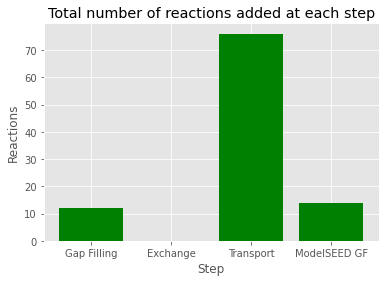

In [344]:
fig = plt.figure()
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(step)]

plt.bar(x_pos, n_r, color = 'green')
plt.xlabel("Step")
plt.ylabel("Reactions")
plt.title("Total number of reactions added at each step")

plt.xticks(x_pos, step)

plt.savefig('barplot.png')

In [350]:
# Heatmap with reactions and models
# First we have to create a matrix of 1s and 0s (rows: models, columns: reactions)
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [454]:
strains = pd.DataFrame(df['Strain'].copy())
strains

,Strain
0,NZ_CP066300.1
1,NZ_CP015899.1
2,NZ_CP015900.1
3,NZ_AP018499.1
4,NC_020450.1
5,NZ_CP015894.1
6,NZ_CP015901.1
7,NZ_LT599049.1
8,NC_008527.1
9,NZ_CP015902.1


In [357]:
# get all different added reactions
# gap filling
all_reactions = []
for i in gap_filled_models:
    if i[1] != {}:
        for j in i[1].keys():
            for k in i[1][j]:
                all_reactions.append(k[0])

In [359]:
# modelseed
for i in ms_gapfilled_models2:
    if i[1] != {}:
        for j in i[1].keys():
            for k in i[1][j]:
                all_reactions.append(k[0])

In [366]:
# transport
for i in transport:
    if i[1] != []:
        for j in i[1]:
            all_reactions.append(j[0])

In [367]:
len(all_reactions)

102

In [369]:
# unique reactions
len(set(all_reactions))

26

In [371]:
all_reactions = list(set(all_reactions))
all_reactions

['rxn10131_c',
 'GACT_h',
 'LEUt2r_copy2',
 'VALt2r_copy2',
 'ILEt2r_copy2',
 'SUCOAS',
 'ACONT',
 'PDHcr',
 'SO4t2',
 'GLCNt2ir',
 'CYTB_B2',
 'AKGDa',
 'ACN_b_m',
 'EX_orn_e',
 'ACN_a_m',
 'CS',
 'AEPabc',
 'GLYC3Pt6',
 'GLUABUTt7',
 'MALt2r',
 'r0422',
 'XANt2',
 'r0082',
 'ARGabc',
 'GALt2',
 'AKGDb_copy1']

In [388]:
# to determine if a reaction has been added to a model we must combine the three previous sets 
reactions_by_model = []
for i in range(len(gap_filled_models)):
    R = []
    R.append(list(gap_filled_models[i][1].values()))
    R.append(list(ms_gapfilled_models2[i][1].values()))
    R.append(list(transport[i][1]))
    reactions_by_model.append(R)

In [392]:
with open('reactions_by_id.txt', 'w') as f:
    for line in reactions_by_model:
        f.write(str(line) + '\n')

In [430]:
reactions_by_id2 = []
# after organising the file
with open('reactions_by_id.txt', 'r') as f:
    for line in f:
        reactions_by_id2.append(line.replace('\n', '').replace("[", "").replace("]", "").replace("'", ""))

In [433]:
W = []
for x in reactions_by_id2:
    x = x.split(',')
    W.append(x)
W

[[''],
 ['GALt2', 'GLUABUTt7', 'MALt2r'],
 ['ARGabc', 'GALt2', 'GLCNt2ir', 'GLYC3Pt6', 'MALt2r', 'XANt2'],
 ['AEPabc', 'GLCNt2ir', 'GLUABUTt7'],
 [''],
 ['ARGabc'],
 ['GLCNt2ir', 'MALt2r'],
 [''],
 ['ACONT', 'r0082', 'r0422', 'CS', 'AEPabc', 'GLCNt2ir', 'MALt2r', 'SO4t2'],
 ['GLUABUTt7'],
 [''],
 ['MALt2r'],
 ['ILEt2r_copy2', 'LEUt2r_copy2', 'MALt2r', 'VALt2r_copy2'],
 ['AEPabc', 'GLCNt2ir', 'GLUABUTt7'],
 ['ARGabc'],
 ['CYTB_B2'],
 [''],
 ['GLCNt2ir', 'SO4t2'],
 ['AEPabc', 'GLCNt2ir', 'GLUABUTt7'],
 ['GLCNt2ir', 'SO4t2'],
 ['PDHcr',
  'SUCOAS',
  'AKGDa',
  'AKGDb_copy1',
  'r0082',
  'r0422',
  'ACN_b_m',
  'ACN_a_m',
  'GLCNt2ir',
  'GLUABUTt7'],
 ['AEPabc', 'CYTB_B2', 'GLCNt2ir', 'MALt2r'],
 ['GLCNt2ir'],
 ['GLCNt2ir', 'MALt2r'],
 ['ARGabc'],
 ['GALt2', 'GLYC3Pt6', 'ILEt2r_copy2', 'LEUt2r_copy2', 'VALt2r_copy2'],
 ['ARGabc'],
 ['AEPabc', 'GLYC3Pt6'],
 ['GALt2'],
 [''],
 ['GLCNt2ir', 'SO4t2', 'XANt2'],
 ['GLCNt2ir'],
 ['PDHcr',
  'SUCOAS',
  'AKGDa',
  'AKGDb_copy1',
  'rxn10131_c',

In [434]:
len(W)

43

In [438]:
Lists = []
for i in range(len(all_reactions)):
    L = []
    for j in W:
        if all_reactions[i] in j:
            L.append(1)
        else:
            L.append(0)
    Lists.append(L)
len(Lists)

26

In [439]:
len(Lists[0])

43

In [455]:
for i in range(len(all_reactions)):
    strains[all_reactions[i]] = Lists[i]
strains

,Strain,rxn10131_c,GACT_h,LEUt2r_copy2,VALt2r_copy2,ILEt2r_copy2,SUCOAS,ACONT,PDHcr,SO4t2,...,AEPabc,GLYC3Pt6,GLUABUTt7,MALt2r,r0422,XANt2,r0082,ARGabc,GALt2,AKGDb_copy1
0,NZ_CP066300.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NZ_CP015899.1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,NZ_CP015900.1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
3,NZ_AP018499.1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,NC_020450.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NZ_CP015894.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,NZ_CP015901.1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,NZ_LT599049.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NC_008527.1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,1,0,1,0,0,0
9,NZ_CP015902.1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [458]:
strains2 = strains.copy()
strains2.index = strains['Strain']

In [459]:
del strains2['Strain']

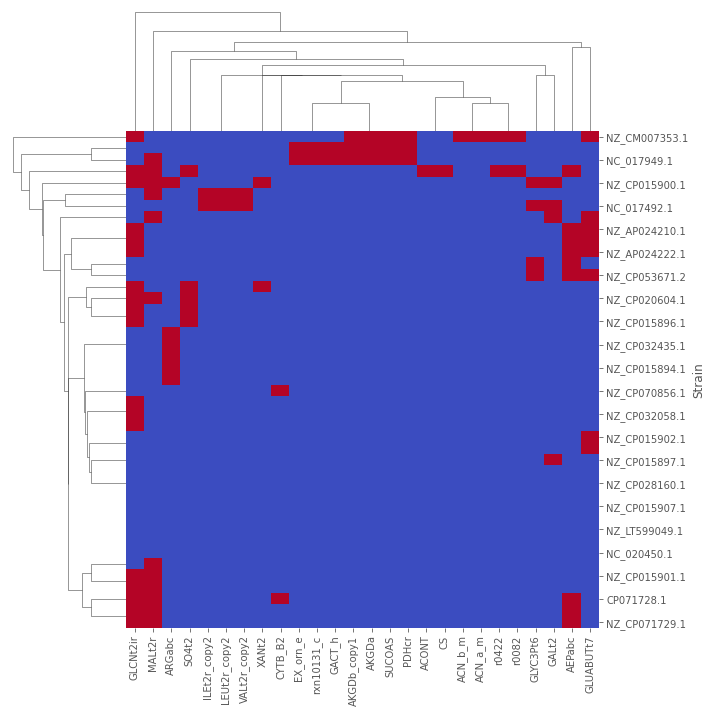

In [462]:
g = sns.clustermap(strains2, cbar_pos=None, cmap = 'coolwarm')